Read datasets and memorize in memory


In [188]:
# read csv datasets in folder and save them in dataframes

import pandas as pd
import matplotlib.pyplot as plt

names = ["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "target"]
dataset_no_drift = pd.read_csv("dataset_no_drift.csv", names=names)
dataset_drift_labels = pd.read_csv("dataset_drift_labels.csv", names=names)
dataset_drift_features = pd.read_csv("dataset_drift_features.csv", names=names)

# print dataset_no_drift shape
print(dataset_no_drift.shape)
dataset_size = dataset_no_drift.shape


(20000, 7)


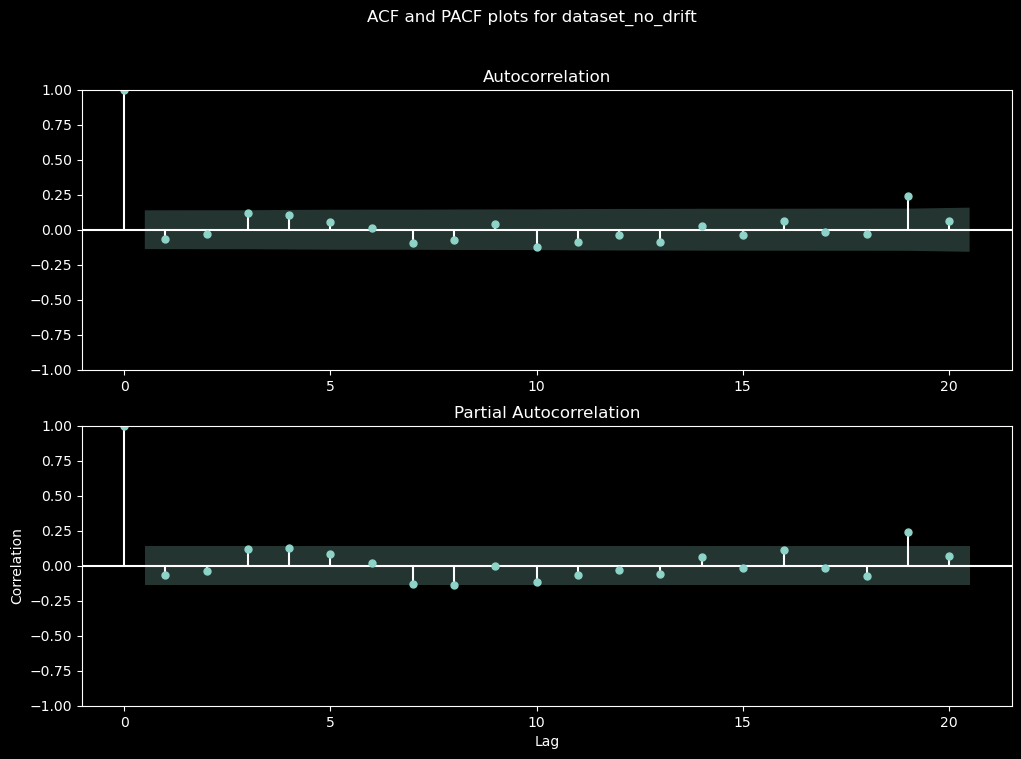

In [123]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Visualizations lag values
lag_acf = 20
lag_pacf = 20

# Plotting the ACF and PACF plots in a single figure
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(dataset_no_drift.iloc[0:200, 0], lags=lag_acf, ax=axes[0])
plot_pacf(dataset_no_drift.iloc[0:200, 0], lags=lag_pacf, ax=axes[1], method='ols')
plt.suptitle("ACF and PACF plots for dataset_no_drift")
plt.xlabel("Lag")
plt.ylabel("Correlation")

plt.show()



The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are used to identify the order of the AR (autoregressive) and MA (moving average) terms in an ARMA (autoregressive moving average) process.

However, if the ARMA process is non-linear, the ACF and PACF plots may not be sufficient to identify the order of the AR and MA terms. This is because non-linear ARMA processes can exhibit complex dependencies that are not captured by the ACF and PACF plots.

In such cases, it may be necessary to use other techniques, such as model selection criteria (such as the Akaike Information Criterion or Bayesian Information Criterion) or machine learning methods to identify the order of the AR and MA terms in the non-linear ARMA process.

Therefore, the results of ACF and PACF plots on a non-linear ARMA process may not be conclusive in determining the appropriate AR and MA terms to use in modeling the process.

Fit ARMA(p, q) model to the dataset

In [124]:
from statsmodels.tsa.arima.model import ARIMA

#using the p, q values from the creation of the dataset
model = ARIMA(dataset_no_drift.iloc[0:200, 0], order=(10, 0, 10))
model_fit = model.fit()

# print model summary
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:               feature1   No. Observations:                  200
Model:               ARIMA(10, 0, 10)   Log Likelihood                -147.839
Date:                Sun, 23 Apr 2023   AIC                            339.678
Time:                        21:22:32   BIC                            412.241
Sample:                             0   HQIC                           369.043
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1278      0.034     -3.808      0.000      -0.194      -0.062
ar.L1         -0.3685      0.464     -0.794      0.427      -1.278       0.541
ar.L2         -0.5092      0.379     -1.343      0.1

d:\Programs\Anaconda\envs\anndl\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Based on the information you provided, it appears that you have run some statistical tests on your data. Let's analyze each of the test results individually:

Ljung-Box (L1) (Q): 0.05, Prob(Q): 0.82:
The Ljung-Box test is a statistical test used to determine whether the residuals of a time series are independently distributed or whether there is some serial correlation present. In this case, the test statistic (Q) is 0.05, and the probability value (Prob(Q)) is 0.82. This suggests that there is no evidence of serial correlation in the residuals of your time series.

Jarque-Bera (JB): 1.23, Prob(JB): 0.54:
The Jarque-Bera test is a statistical test used to determine whether a data sample has skewness and kurtosis that matches a normal distribution. In this case, the test statistic (JB) is 1.23, and the probability value (Prob(JB)) is 0.54. Since the probability value is greater than 0.05 (i.e., the commonly used significance level), we can conclude that the sample is likely drawn from a normal distribution.

Heteroskedasticity (H): 0.91, Prob(H) (two-sided): 0.69:
The term heteroskedasticity refers to the situation where the variance of the residuals in a regression or time series model is not constant over time. In this case, the test statistic (H) is 0.91, and the probability value (Prob(H)) is 0.69. Since the probability value is greater than 0.05, we can conclude that there is no evidence of heteroskedasticity in your time series.

Overall, based on the statistical test results you provided, it appears that your time series does not exhibit serial correlation, is likely normally distributed, and does not suffer from heteroskedasticity.

Plot model diagnostics of the arma model


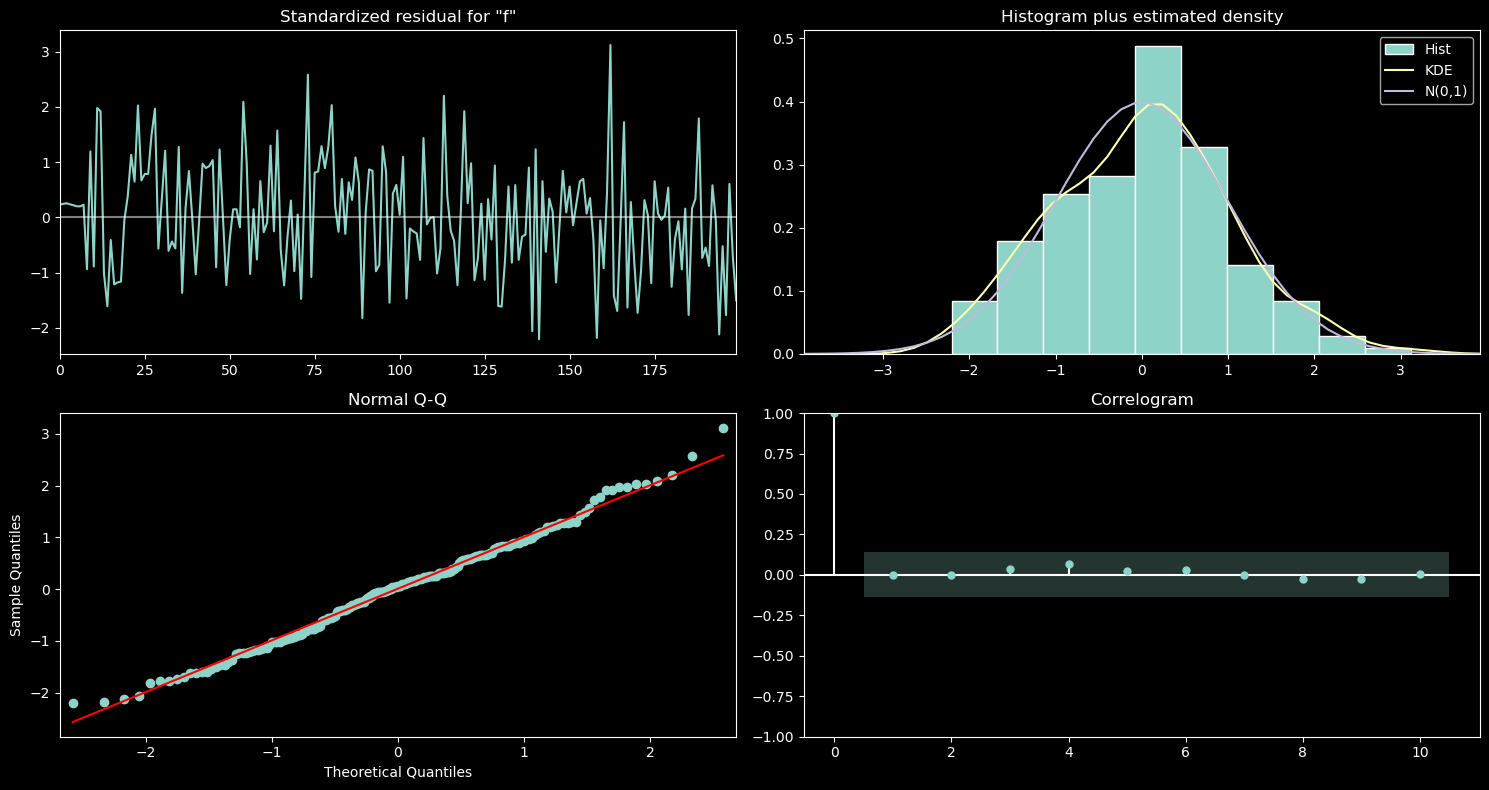

In [125]:
model_fit.plot_diagnostics(figsize=(15,8))
plt.tight_layout()
plt.show()

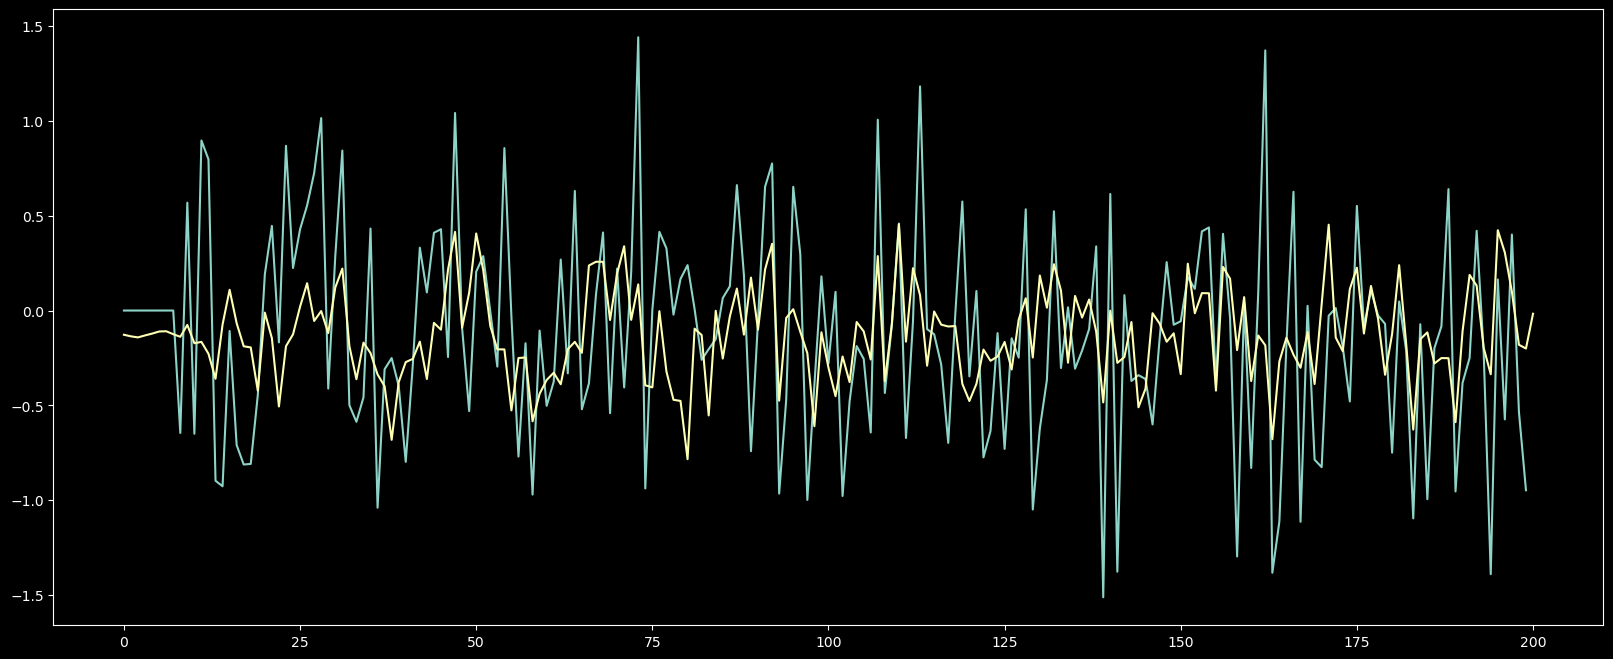

Test RMSE: 0.506


In [126]:
#plot model predictions overlapped with the actual values of the dataset
plt.plot(dataset_no_drift.iloc[0:200, 0])
plt.plot(model_fit.predict(0, 200))
#plot width and height
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

# evaluate model accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt

# calculate root mean squared error
rmse = sqrt(mean_squared_error(dataset_no_drift.iloc[0:200, 0], model_fit.predict(0, 199)))
print('Test RMSE: %.3f' % rmse)


In [127]:
#compute augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset_no_drift.iloc[:, 0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %f' % result[2])
print('Number of Observations Used: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# p-value is less than 0.05, so we can reject the null hypothesis that the data is not stationary
# therefore we conclude that the data is stationary


ADF Statistic: -37.864653
p-value: 0.000000
Lags Used: 11.000000
Number of Observations Used: 19988.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Cross correlation between variables and their lagged version

In [223]:

features = dataset_no_drift.columns[:-1]
target = dataset_no_drift.columns[-1]
print(list(features), target)


['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6'] target


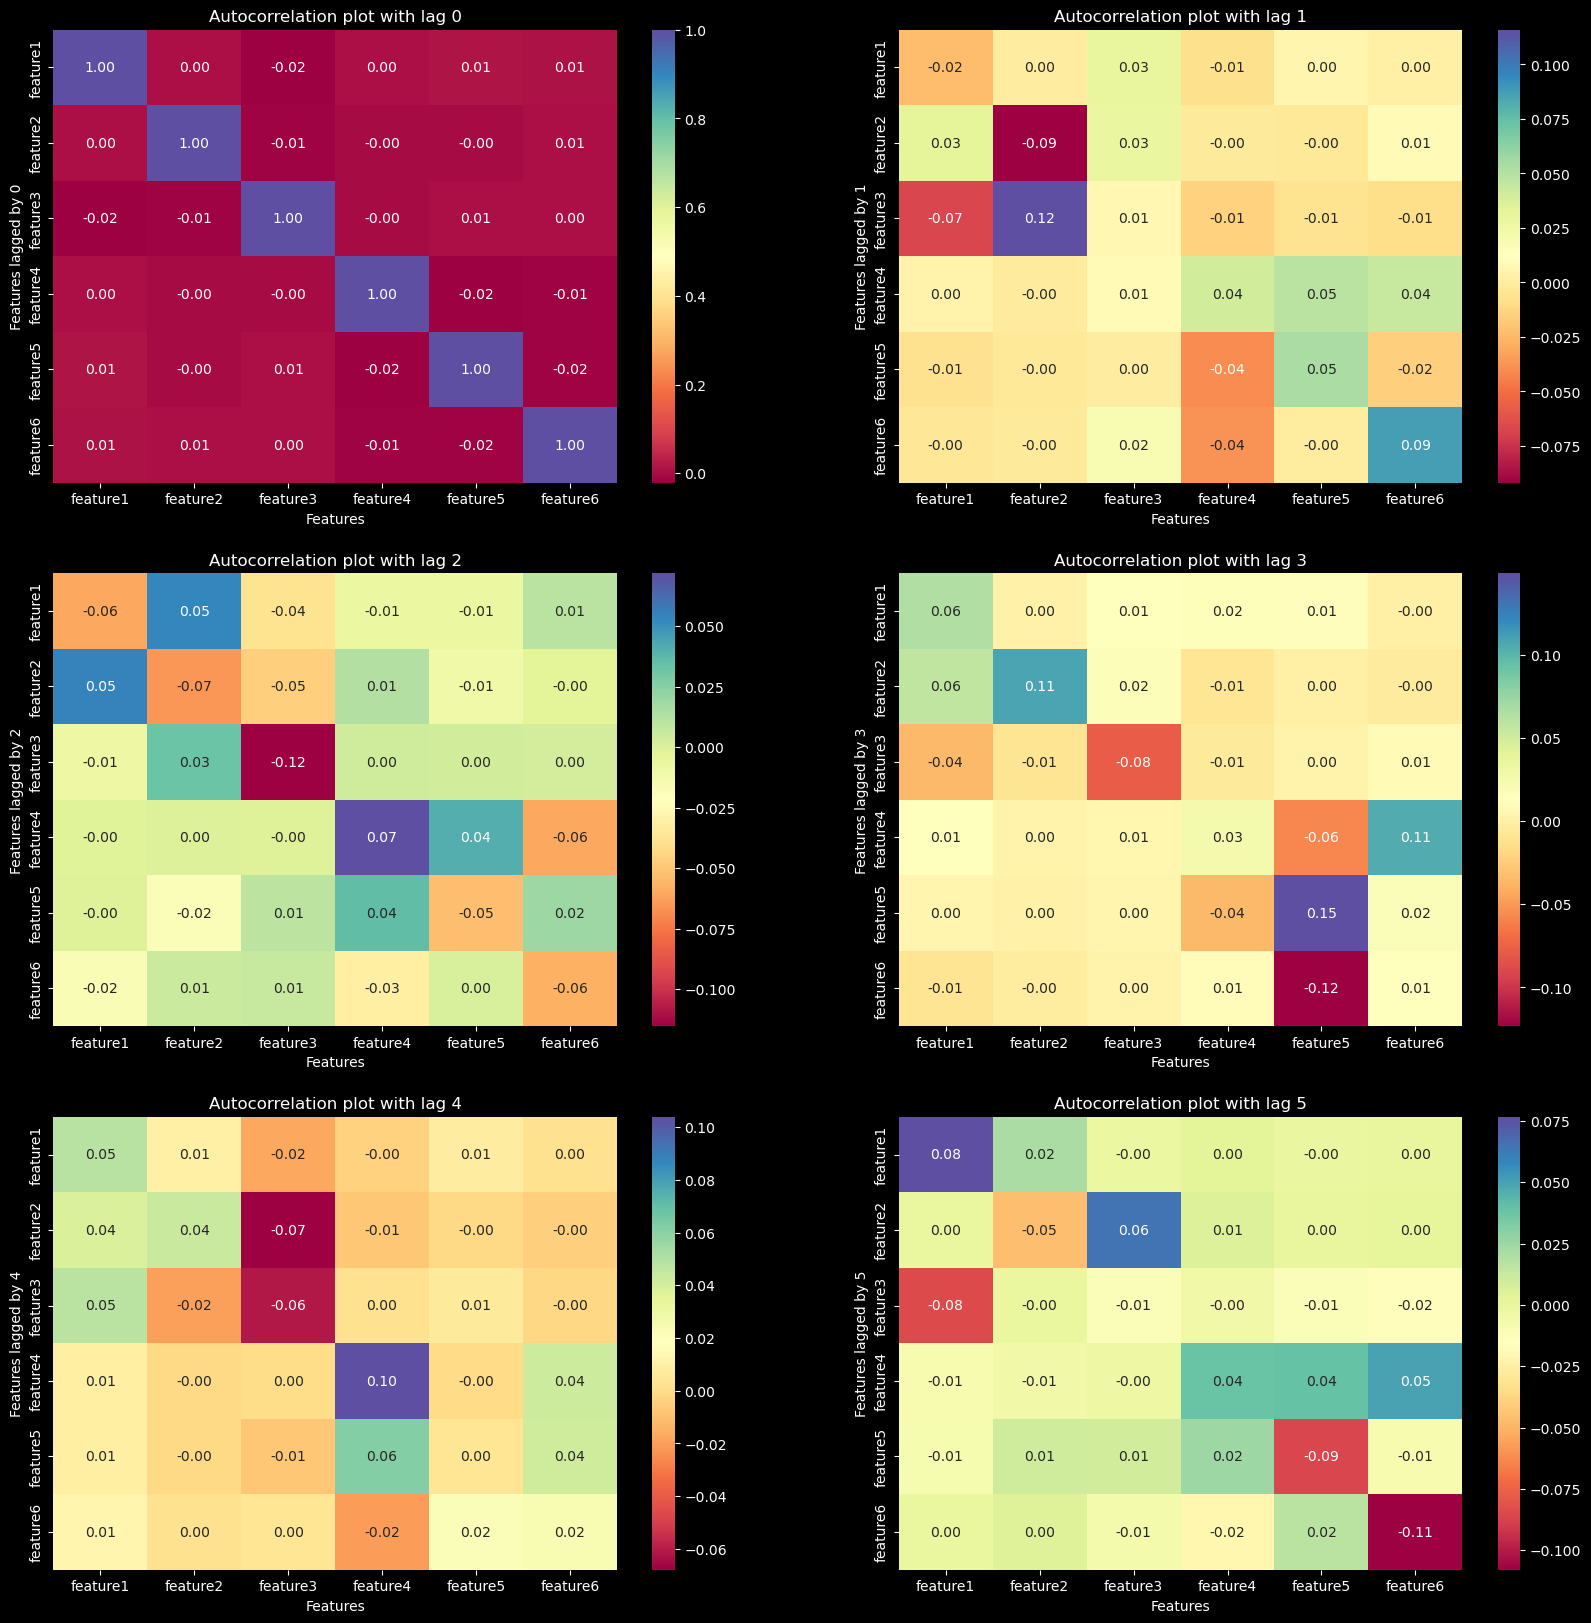

In [222]:
import seaborn as sns
import numpy as np

# create empty array to store the cross-correlation values, for each feature and lag up to lag=6
crosscorr = np.empty((6, 6, 6))

# Compute the cross-correlation for each feature and lag up to 6
for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        for k in range(6):
            crosscorr[i, j, k] = dataset_no_drift[feature_x].corr(dataset_no_drift[feature_y].shift(k))

# Plot the cross-correlation matrix as a figure with 3x2 squared subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(crosscorr[:, :, i], annot=True, fmt=".2f", cmap='Spectral', ax=ax)
    ax.set_title("Autocorrelation plot with lag {}".format(i))
    ax.set_xlabel("Features")
    ax.set_ylabel("Features lagged by {}".format(i))
    # add x and y ticks
    ax.set_xticks(np.arange(6)+0.5)
    ax.set_yticks(np.arange(6)+0.5)
    ax.set_xticklabels(features)
    ax.set_yticklabels(features)


plt.show()

# Streaming Machine Learning models

In [128]:
from river.stream import iter_pandas
from river.metrics import Accuracy, CohenKappa, F1, Recall, Precision
from river.metrics.base import Metrics
from river.evaluate import iter_progressive_val_score
from river.tree import HoeffdingTreeClassifier, HoeffdingAdaptiveTreeClassifier
from river.ensemble import SRPClassifier, AdaptiveRandomForestClassifier

# import temporally augmented classifier
from temporally_augmented_classifier import TemporallyAugmentedClassifier

# import kappa temporal metric from kappa_t.py file
from kappa_t import CohenKappaTemporal

import numpy as np


progressive model evaluation function with all the metrics

In [189]:
def prequential_evaluation(datastream, model):
    # initialize metrics
	my_metrics = Metrics(metrics = [
		Accuracy(),
		CohenKappa(),
		CohenKappaTemporal(),
		F1(),
		Recall(),
		Precision()
	])
	# evaluate model
	metric_results = iter_progressive_val_score(dataset = datastream, model = model, metric = my_metrics)

	# copy metric results as a typing generator into a numpy array
	# create an array of size (len(results), len(columns)) with the float values
	results = np.empty(dataset_size, dtype = float)
	for i, element in enumerate(metric_results):
		values_dict = np.array(list(element.values()))
		if (i % 1000 == 0):
			# print element of the values dict separated by commas
			print(*values_dict, sep = ", ")
		# get the float values from the string values in the results array
		results[i, :] = [extract_float(x) for x in values_dict]
	
	return results

Plotting function for the metrics over the training time

In [190]:
# extract a float number from a string, for example: "asd0.5sad" -> 0.5
def extract_float(string):
	string = str(string)
	number = float(''.join(ele for ele in string if ele.isdigit() or ele == '.'))
	if (number > 100):
		number = number - 100.0;
	return number / 100.0

# plot the results in a single plot, where each column values are plotted as a line
def plot_metrics(results):
	
	fig, ax = plt.subplots()
	# metrics list used in the evaluation
	labels = ["Accuracy", "CohenKappa", "CohenKappaTemporal", "F1", "Recall", "Precision"]
	for i in range(0, results.shape[1] - 1):
		ax.plot(results[10:, i], label=labels[i])

	ax.set_xlabel("Instances")
	ax.set_ylabel("Metric value")
	ax.set_title("Metrics")
	ax.legend()
	plt.show()



## use dataset with no concept drift and base learners

Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 68.10%, CohenKappa: 0.92%, CohenKappaTemporal: 63.80%, F1: 80.82%, Recall: 97.82%, Precision: 68.85%, 1001
Accuracy: 70.80%, CohenKappa: 0.70%, CohenKappaTemporal: 58.40%, F1: 82.81%, Recall: 98.95%, Precision: 71.20%, 2001
Accuracy: 69.93%, CohenKappa: 0.40%, CohenKappaTemporal: 60.13%, F1: 82.24%, Recall: 99.29%, Precision: 70.19%, 3001
Accuracy: 68.95%, CohenKappa: -0.04%, CohenKappaTemporal: 62.10%, F1: 81.57%, Recall: 99.24%, Precision: 69.24%, 4001
Accuracy: 69.68%, CohenKappa: -0.00%, CohenKappaTemporal: 60.64%, F1: 82.09%, Recall: 99.40%, Precision: 69.92%, 5001
Accuracy: 70.18%, CohenKappa: 0.03%, CohenKappaTemporal: 59.63%, F1: 82.45%, Recall: 99.46%, Precision: 70.40%, 6001
Accuracy: 69.50%, CohenKappa: -0.00%, CohenKappaTemporal: 61.00%, F1: 81.98%, Recall: 99.53%, Precision: 69.69%, 7001
Accuracy: 68.90%, CohenKappa: -0.10%, CohenKappaTemporal: 62.20%, F1:

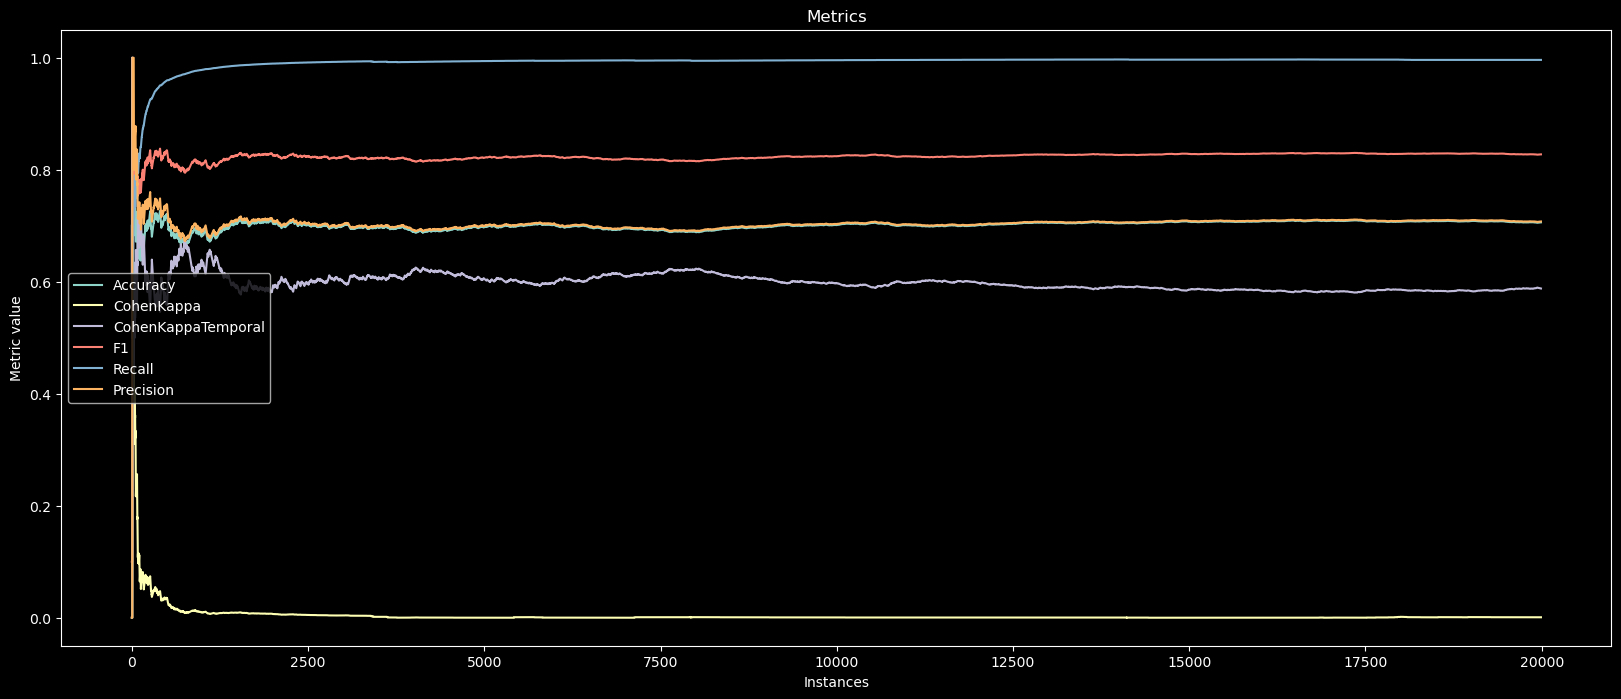

In [191]:
datastream = iter_pandas(X = dataset_no_drift[features], y = dataset_no_drift[target])

model = HoeffdingTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

Use temporal augmentation for the hoeffding tree classifier

Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 84.10%, CohenKappa: 63.44%, CohenKappaTemporal: 31.80%, F1: 88.32%, Recall: 87.48%, Precision: 89.17%, 1001
Accuracy: 86.00%, CohenKappa: 66.14%, CohenKappaTemporal: 28.00%, F1: 90.11%, Recall: 89.73%, Precision: 90.50%, 2001
Accuracy: 86.03%, CohenKappa: 66.80%, CohenKappaTemporal: 27.93%, F1: 90.01%, Recall: 89.73%, Precision: 90.29%, 3001
Accuracy: 85.97%, CohenKappa: 67.17%, CohenKappaTemporal: 28.05%, F1: 89.85%, Recall: 89.64%, Precision: 90.06%, 4001
Accuracy: 86.12%, CohenKappa: 67.10%, CohenKappaTemporal: 27.76%, F1: 90.05%, Recall: 89.85%, Precision: 90.26%, 5001
Accuracy: 85.92%, CohenKappa: 66.31%, CohenKappaTemporal: 28.17%, F1: 89.98%, Recall: 89.77%, Precision: 90.18%, 6001
Accuracy: 85.96%, CohenKappa: 66.85%, CohenKappaTemporal: 28.09%, F1: 89.90%, Recall: 89.73%, Precision: 90.08%, 7001
Accuracy: 85.96%, CohenKappa: 67.18%, CohenKappaTemporal: 28.08%,

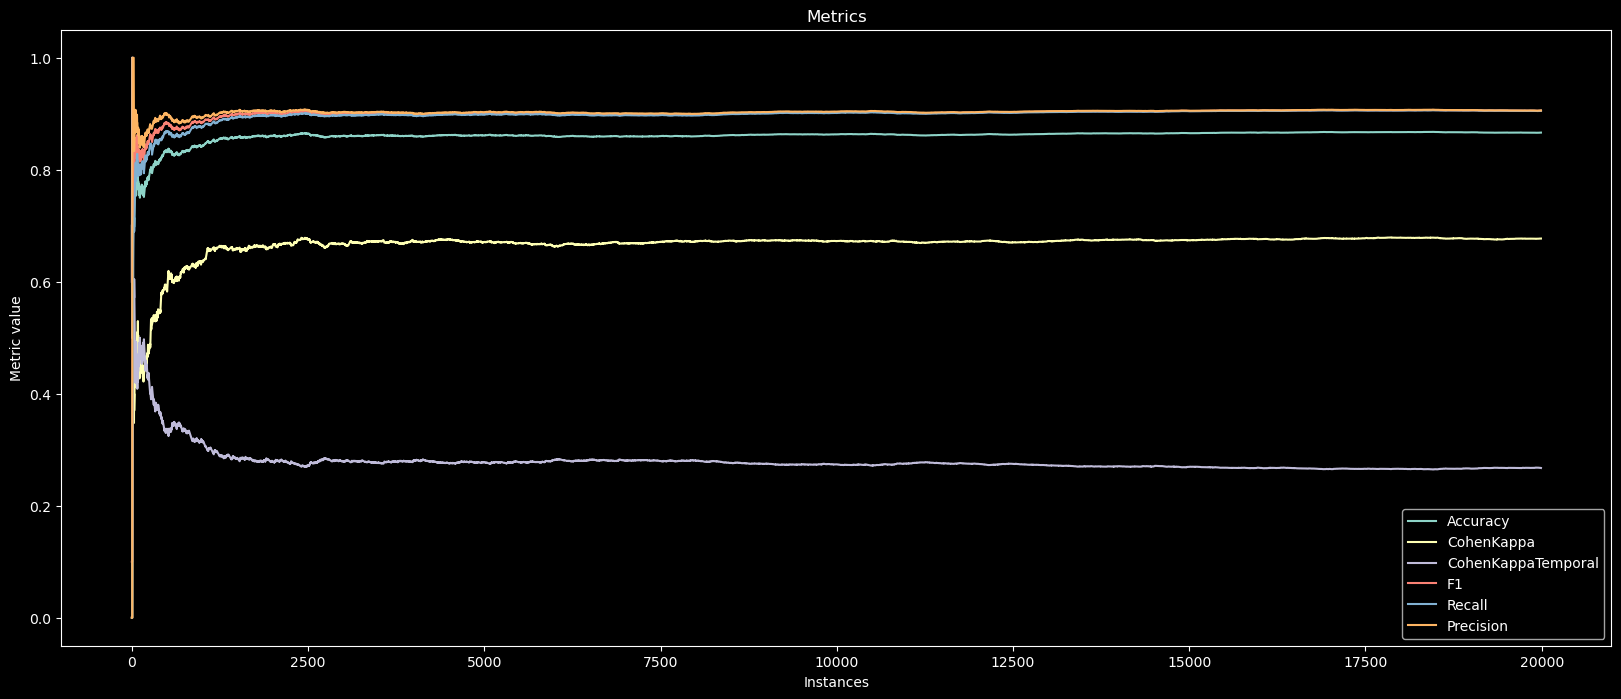

In [176]:
datastream = iter_pandas(X = dataset_no_drift[features], y = dataset_no_drift[target])

# crate hoeffding tree classifier model using temporally augmented classifier as base learner
model = TemporallyAugmentedClassifier(base_learner=HoeffdingTreeClassifier(), num_old_labels=5)

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

## Streaming Machine Learning models on datasets with concept drift

### Evaluation on the dataset with concept drift in the features

Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 47.20%, CohenKappa: -5.64%, CohenKappaTemporal: 105.60%, F1: 41.59%, Recall: 37.68%, Precision: 46.42%, 1001
Accuracy: 50.15%, CohenKappa: -0.75%, CohenKappaTemporal: 99.70%, F1: 56.44%, Recall: 62.00%, Precision: 51.80%, 2001
Accuracy: 50.40%, CohenKappa: -1.08%, CohenKappaTemporal: 99.20%, F1: 60.38%, Recall: 72.69%, Precision: 51.64%, 3001
Accuracy: 51.00%, CohenKappa: -0.55%, CohenKappaTemporal: 98.00%, F1: 62.35%, Recall: 77.62%, Precision: 52.10%, 4001
Accuracy: 51.14%, CohenKappa: 1.47%, CohenKappaTemporal: 97.72%, F1: 61.34%, Recall: 76.30%, Precision: 51.28%, 5001
Accuracy: 51.97%, CohenKappa: 3.75%, CohenKappaTemporal: 96.07%, F1: 60.70%, Recall: 73.88%, Precision: 51.52%, 6001
Accuracy: 52.07%, CohenKappa: 4.44%, CohenKappaTemporal: 95.86%, F1: 59.28%, Recall: 70.37%, Precision: 51.21%, 7001
Accuracy: 52.16%, CohenKappa: 4.19%, CohenKappaTemporal: 95.67%, F1

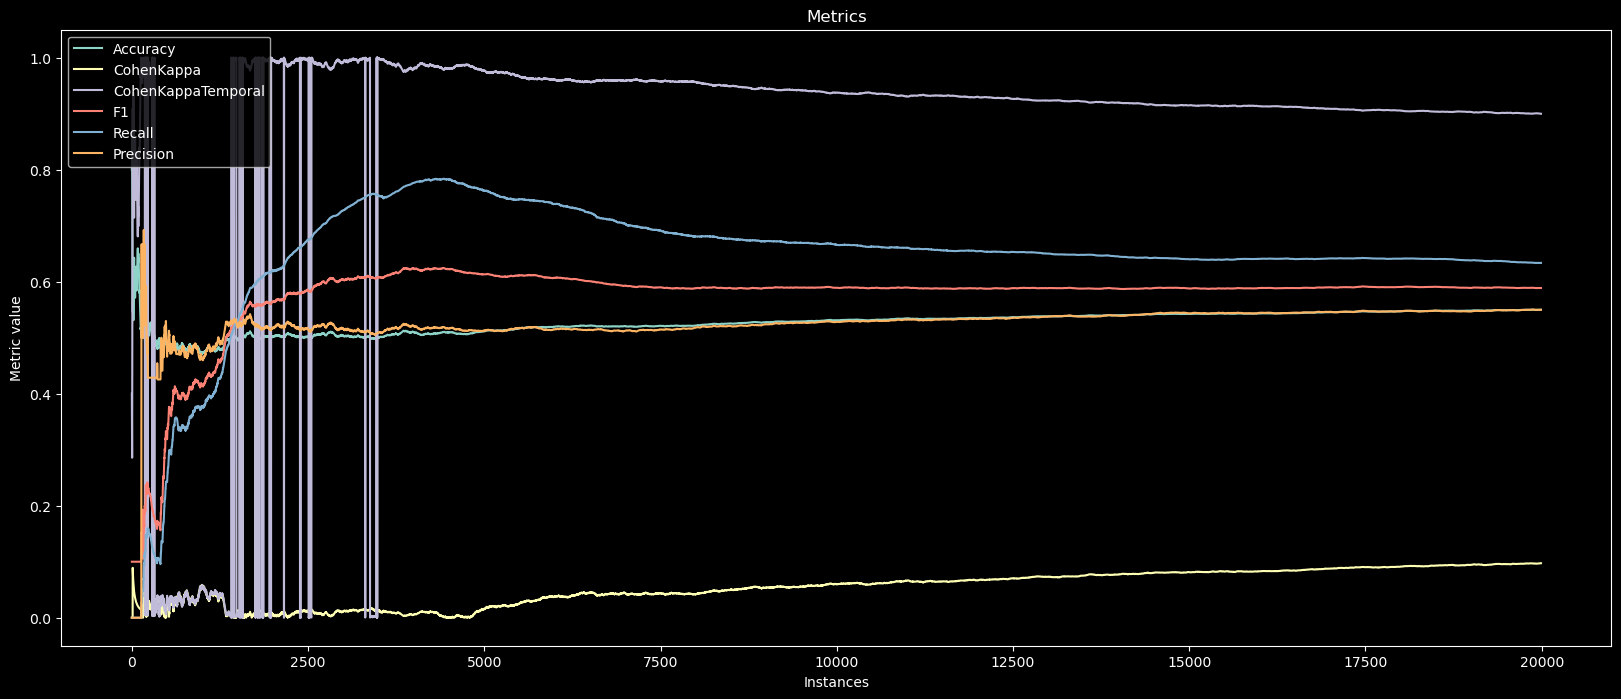

In [177]:

datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
model = HoeffdingTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)


Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 48.00%, CohenKappa: -3.97%, CohenKappaTemporal: 104.00%, F1: 51.13%, Recall: 54.51%, Precision: 48.14%, 1001
Accuracy: 50.40%, CohenKappa: -0.84%, CohenKappaTemporal: 99.20%, F1: 59.18%, Recall: 69.00%, Precision: 51.80%, 2001
Accuracy: 50.77%, CohenKappa: -0.32%, CohenKappaTemporal: 98.47%, F1: 60.62%, Recall: 72.88%, Precision: 51.89%, 3001
Accuracy: 51.80%, CohenKappa: 2.01%, CohenKappaTemporal: 96.40%, F1: 59.88%, Recall: 68.82%, Precision: 53.00%, 4001
Accuracy: 53.22%, CohenKappa: 5.99%, CohenKappaTemporal: 93.56%, F1: 59.62%, Recall: 67.99%, Precision: 53.09%, 5001
Accuracy: 53.42%, CohenKappa: 6.73%, CohenKappaTemporal: 93.17%, F1: 58.94%, Recall: 66.58%, Precision: 52.87%, 6001
Accuracy: 53.51%, CohenKappa: 7.20%, CohenKappaTemporal: 92.97%, F1: 57.86%, Recall: 64.38%, Precision: 52.54%, 7001
Accuracy: 54.05%, CohenKappa: 8.03%, CohenKappaTemporal: 91.90%, F1:

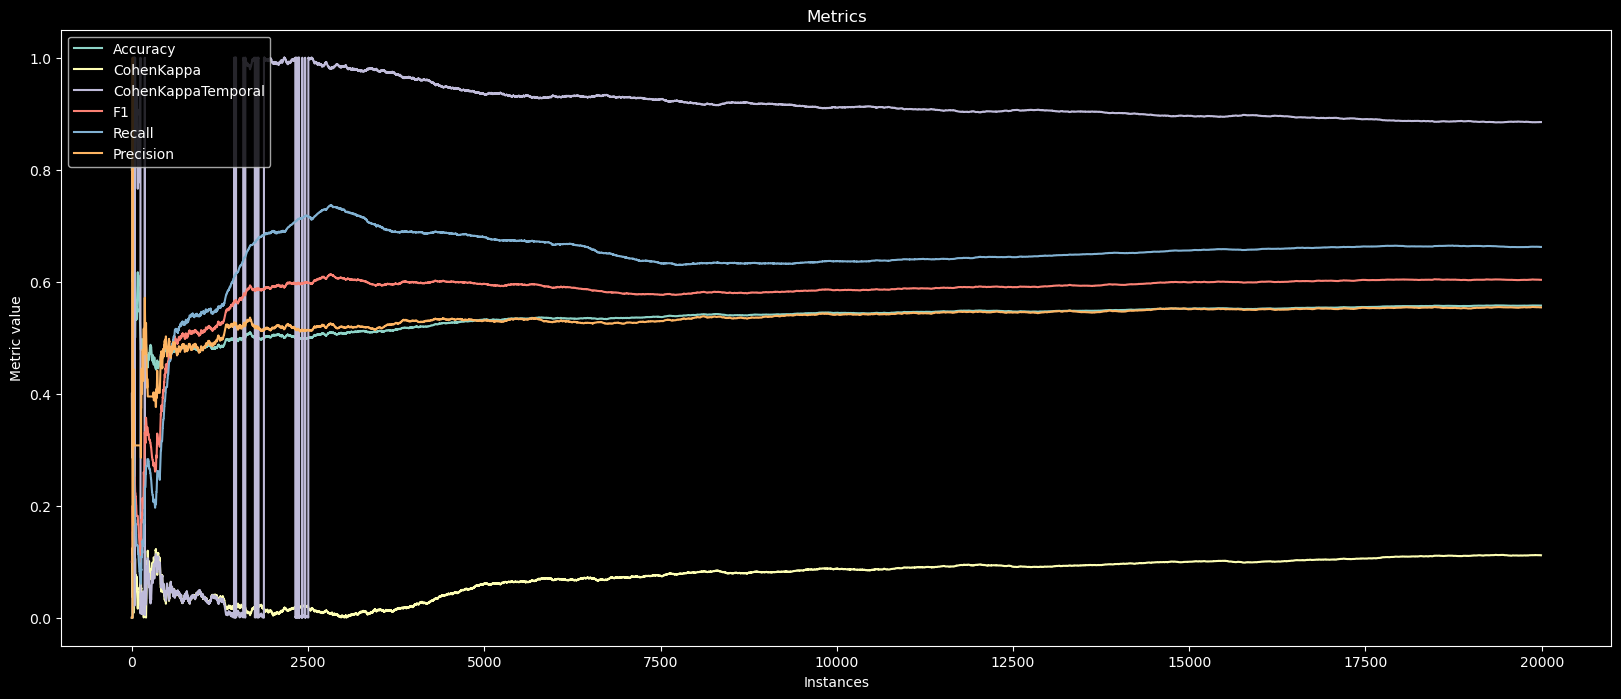

In [184]:
datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
model = HoeffdingAdaptiveTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)


Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 77.30%, CohenKappa: 54.60%, CohenKappaTemporal: 45.40%, F1: 77.05%, Recall: 76.35%, Precision: 77.76%, 1001
Accuracy: 78.40%, CohenKappa: 56.74%, CohenKappaTemporal: 43.20%, F1: 79.17%, Recall: 78.79%, Precision: 79.55%, 2001
Accuracy: 78.27%, CohenKappa: 56.48%, CohenKappaTemporal: 43.47%, F1: 79.04%, Recall: 78.78%, Precision: 79.29%, 3001
Accuracy: 79.53%, CohenKappa: 58.97%, CohenKappaTemporal: 40.95%, F1: 80.37%, Recall: 80.20%, Precision: 80.55%, 4001
Accuracy: 79.54%, CohenKappa: 59.07%, CohenKappaTemporal: 40.92%, F1: 79.81%, Recall: 79.61%, Precision: 80.02%, 5001
Accuracy: 79.42%, CohenKappa: 58.83%, CohenKappaTemporal: 41.17%, F1: 79.45%, Recall: 79.22%, Precision: 79.67%, 6001
Accuracy: 79.46%, CohenKappa: 58.91%, CohenKappaTemporal: 41.09%, F1: 79.21%, Recall: 78.96%, Precision: 79.47%, 7001
Accuracy: 79.42%, CohenKappa: 58.85%, CohenKappaTemporal: 41.15%,

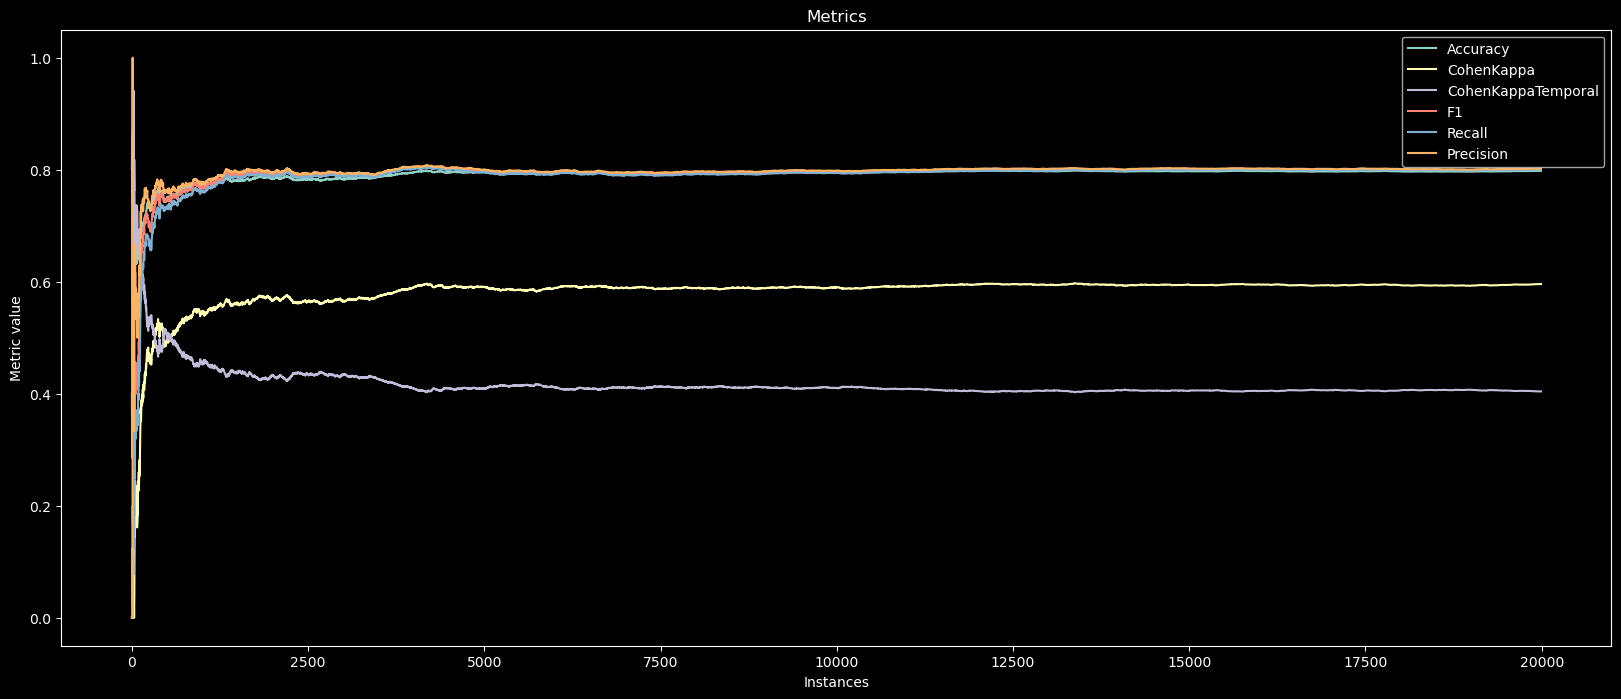

In [178]:
datastream = iter_pandas(X = dataset_drift_features[features], y = dataset_drift_features[target])
model = TemporallyAugmentedClassifier(base_learner=HoeffdingAdaptiveTreeClassifier(), num_old_labels=5)
metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

#### evaluation on the dataset with concept drift on the labels

Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 67.90%, CohenKappa: 3.16%, CohenKappaTemporal: 64.20%, F1: 80.49%, Recall: 97.07%, Precision: 68.74%, 1001
Accuracy: 72.45%, CohenKappa: 2.43%, CohenKappaTemporal: 55.10%, F1: 83.87%, Recall: 98.62%, Precision: 72.95%, 2001
Accuracy: 70.80%, CohenKappa: 1.40%, CohenKappaTemporal: 58.40%, F1: 82.79%, Recall: 99.06%, Precision: 71.11%, 3001
Accuracy: 68.50%, CohenKappa: 1.28%, CohenKappaTemporal: 63.00%, F1: 81.15%, Recall: 98.80%, Precision: 68.86%, 4001
Accuracy: 68.78%, CohenKappa: 1.39%, CohenKappaTemporal: 62.44%, F1: 81.33%, Recall: 98.58%, Precision: 69.22%, 5001
Accuracy: 69.77%, CohenKappa: 1.29%, CohenKappaTemporal: 60.47%, F1: 82.06%, Recall: 98.83%, Precision: 70.15%, 6001
Accuracy: 70.31%, CohenKappa: 1.17%, CohenKappaTemporal: 59.37%, F1: 82.46%, Recall: 99.01%, Precision: 70.65%, 7001
Accuracy: 70.26%, CohenKappa: 1.02%, CohenKappaTemporal: 59.47%, F1: 82.

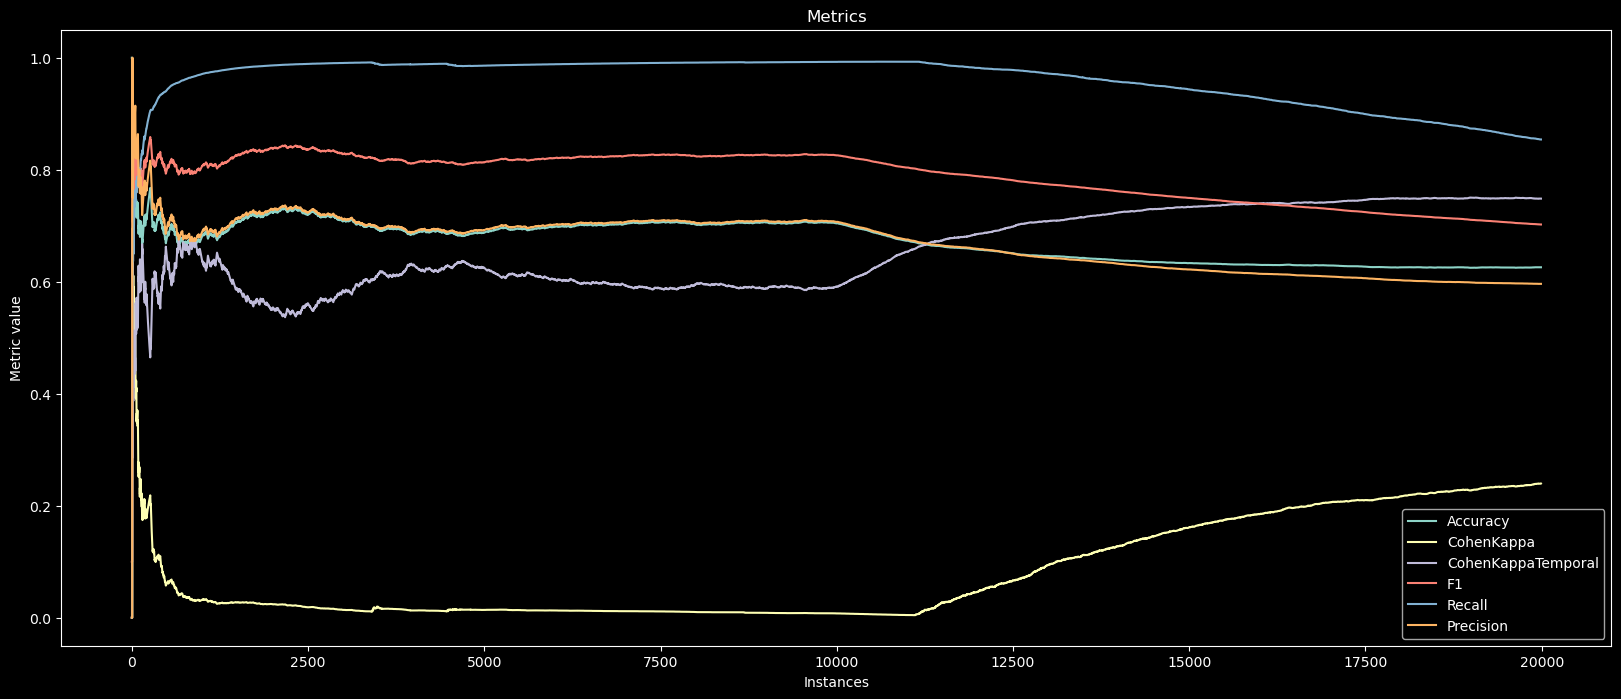

In [181]:

datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
model = HoeffdingTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)


Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 67.80%, CohenKappa: 3.81%, CohenKappaTemporal: 64.40%, F1: 80.32%, Recall: 96.33%, Precision: 68.87%, 1001
Accuracy: 72.40%, CohenKappa: 2.95%, CohenKappaTemporal: 55.20%, F1: 83.79%, Recall: 98.28%, Precision: 73.03%, 2001
Accuracy: 70.53%, CohenKappa: 1.25%, CohenKappaTemporal: 58.93%, F1: 82.58%, Recall: 98.50%, Precision: 71.09%, 3001
Accuracy: 68.38%, CohenKappa: 1.38%, CohenKappaTemporal: 63.25%, F1: 81.03%, Recall: 98.40%, Precision: 68.88%, 4001
Accuracy: 68.78%, CohenKappa: 1.16%, CohenKappaTemporal: 62.44%, F1: 81.36%, Recall: 98.72%, Precision: 69.19%, 5001
Accuracy: 69.73%, CohenKappa: 1.18%, CohenKappaTemporal: 60.53%, F1: 82.04%, Recall: 98.81%, Precision: 70.13%, 6001
Accuracy: 70.24%, CohenKappa: 0.99%, CohenKappaTemporal: 59.51%, F1: 82.41%, Recall: 98.93%, Precision: 70.62%, 7001
Accuracy: 70.16%, CohenKappa: 0.99%, CohenKappaTemporal: 59.67%, F1: 82.

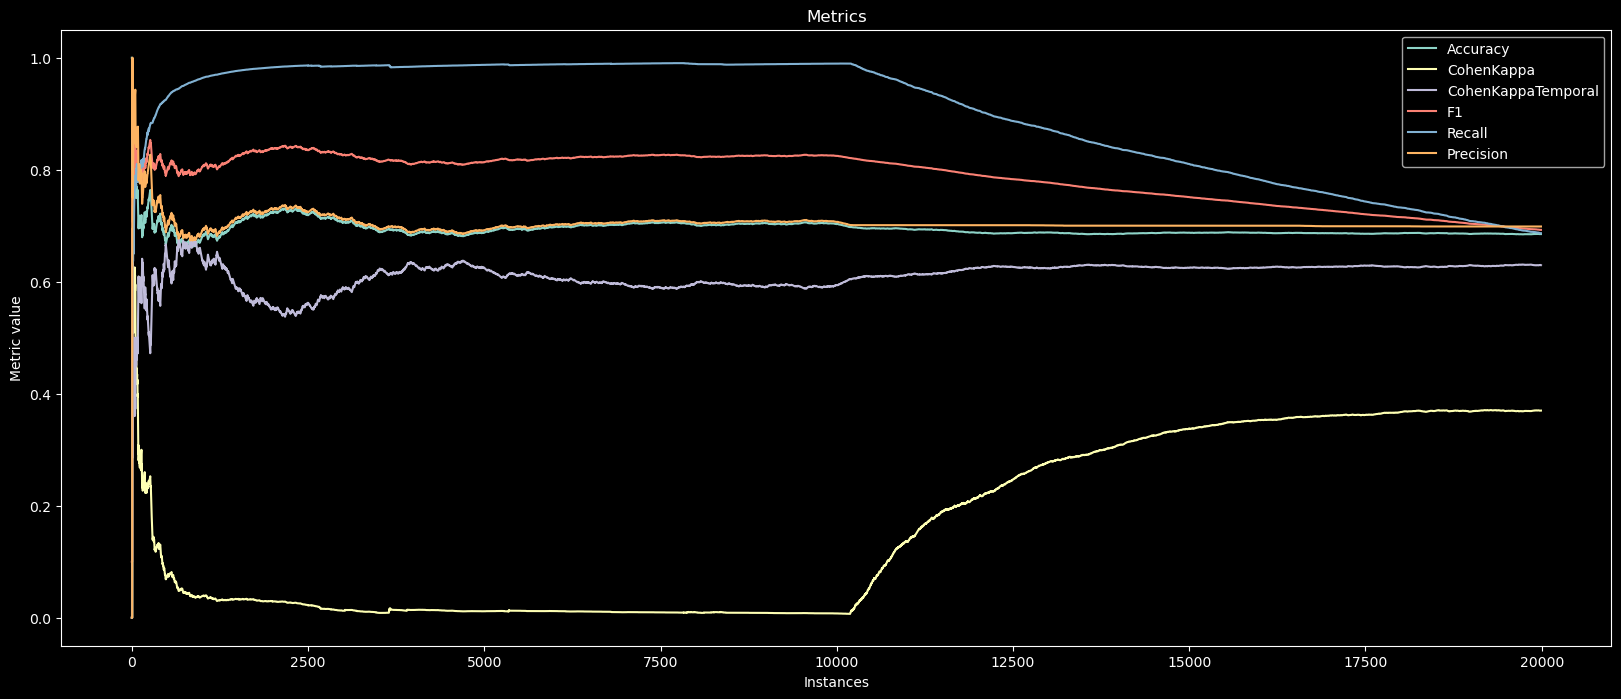

In [182]:
datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
model = HoeffdingAdaptiveTreeClassifier()

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 86.20%, CohenKappa: 68.24%, CohenKappaTemporal: 27.60%, F1: 89.87%, Recall: 89.74%, Precision: 90.00%, 1001
Accuracy: 87.65%, CohenKappa: 68.98%, CohenKappaTemporal: 24.70%, F1: 91.49%, Recall: 91.46%, Precision: 91.52%, 2001
Accuracy: 87.03%, CohenKappa: 68.59%, CohenKappaTemporal: 25.93%, F1: 90.85%, Recall: 90.83%, Precision: 90.87%, 3001
Accuracy: 86.60%, CohenKappa: 68.91%, CohenKappaTemporal: 26.80%, F1: 90.23%, Recall: 90.13%, Precision: 90.33%, 4001
Accuracy: 86.92%, CohenKappa: 69.47%, CohenKappaTemporal: 26.16%, F1: 90.51%, Recall: 90.41%, Precision: 90.62%, 5001
Accuracy: 86.70%, CohenKappa: 68.40%, CohenKappaTemporal: 26.60%, F1: 90.48%, Recall: 90.40%, Precision: 90.57%, 6001
Accuracy: 86.71%, CohenKappa: 68.11%, CohenKappaTemporal: 26.57%, F1: 90.57%, Recall: 90.49%, Precision: 90.64%, 7001
Accuracy: 86.55%, CohenKappa: 67.78%, CohenKappaTemporal: 26.90%,

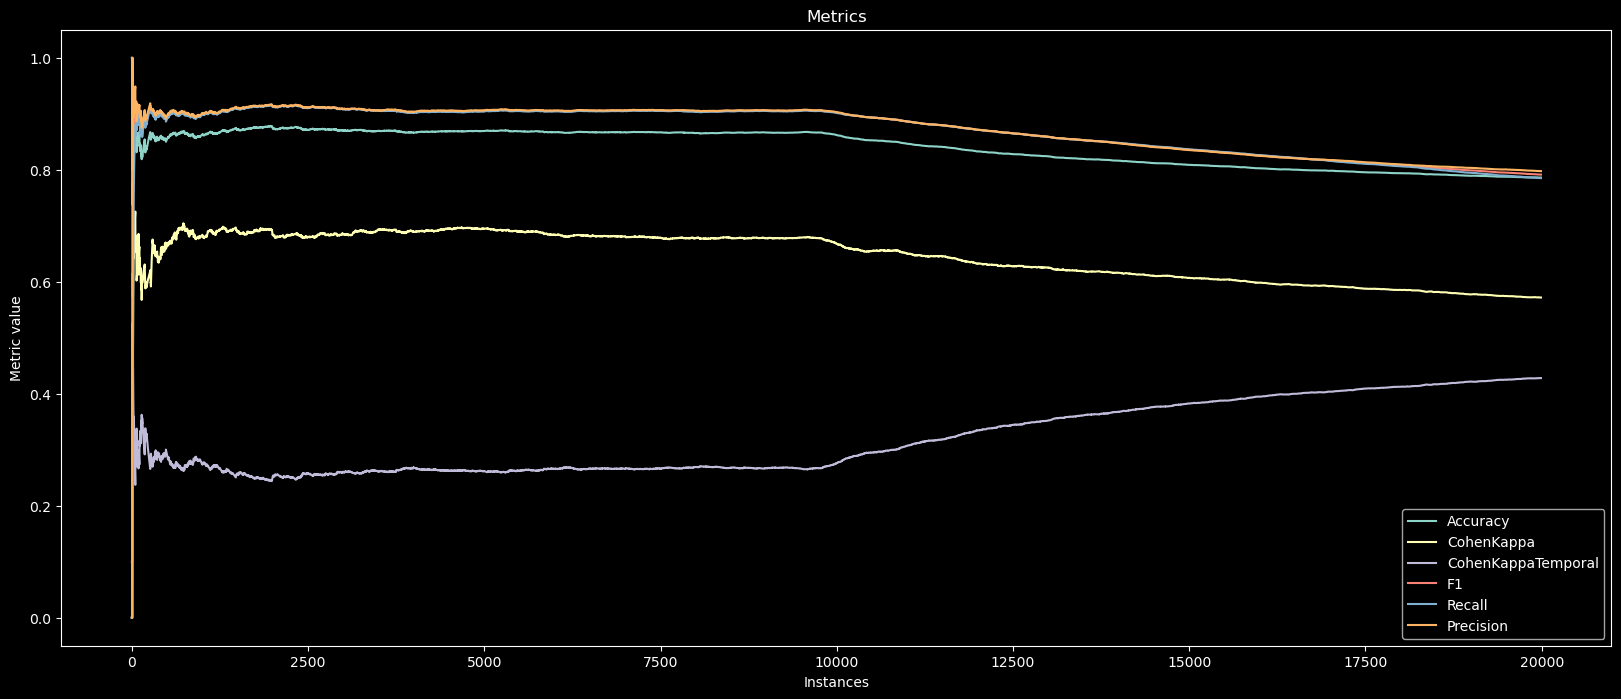

In [183]:
datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
model = TemporallyAugmentedClassifier(base_learner=HoeffdingAdaptiveTreeClassifier(), num_old_labels=5)

metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

Accuracy: 0.00%, CohenKappa: 0.00%, CohenKappaTemporal: 0.00%, F1: 0.00%, Recall: 0.00%, Precision: 0.00%, 1
Accuracy: 67.90%, CohenKappa: 3.16%, CohenKappaTemporal: 64.20%, F1: 80.49%, Recall: 97.07%, Precision: 68.74%, 1001
Accuracy: 72.45%, CohenKappa: 2.43%, CohenKappaTemporal: 55.10%, F1: 83.87%, Recall: 98.62%, Precision: 72.95%, 2001
Accuracy: 70.80%, CohenKappa: 1.40%, CohenKappaTemporal: 58.40%, F1: 82.79%, Recall: 99.06%, Precision: 71.11%, 3001
Accuracy: 68.58%, CohenKappa: 0.85%, CohenKappaTemporal: 62.85%, F1: 81.26%, Recall: 99.27%, Precision: 68.79%, 4001
Accuracy: 68.94%, CohenKappa: 0.71%, CohenKappaTemporal: 62.12%, F1: 81.54%, Recall: 99.42%, Precision: 69.11%, 5001
Accuracy: 69.90%, CohenKappa: 0.65%, CohenKappaTemporal: 60.20%, F1: 82.22%, Recall: 99.52%, Precision: 70.05%, 6001
Accuracy: 70.43%, CohenKappa: 0.58%, CohenKappaTemporal: 59.14%, F1: 82.60%, Recall: 99.59%, Precision: 70.56%, 7001
Accuracy: 70.36%, CohenKappa: 0.51%, CohenKappaTemporal: 59.28%, F1: 82.

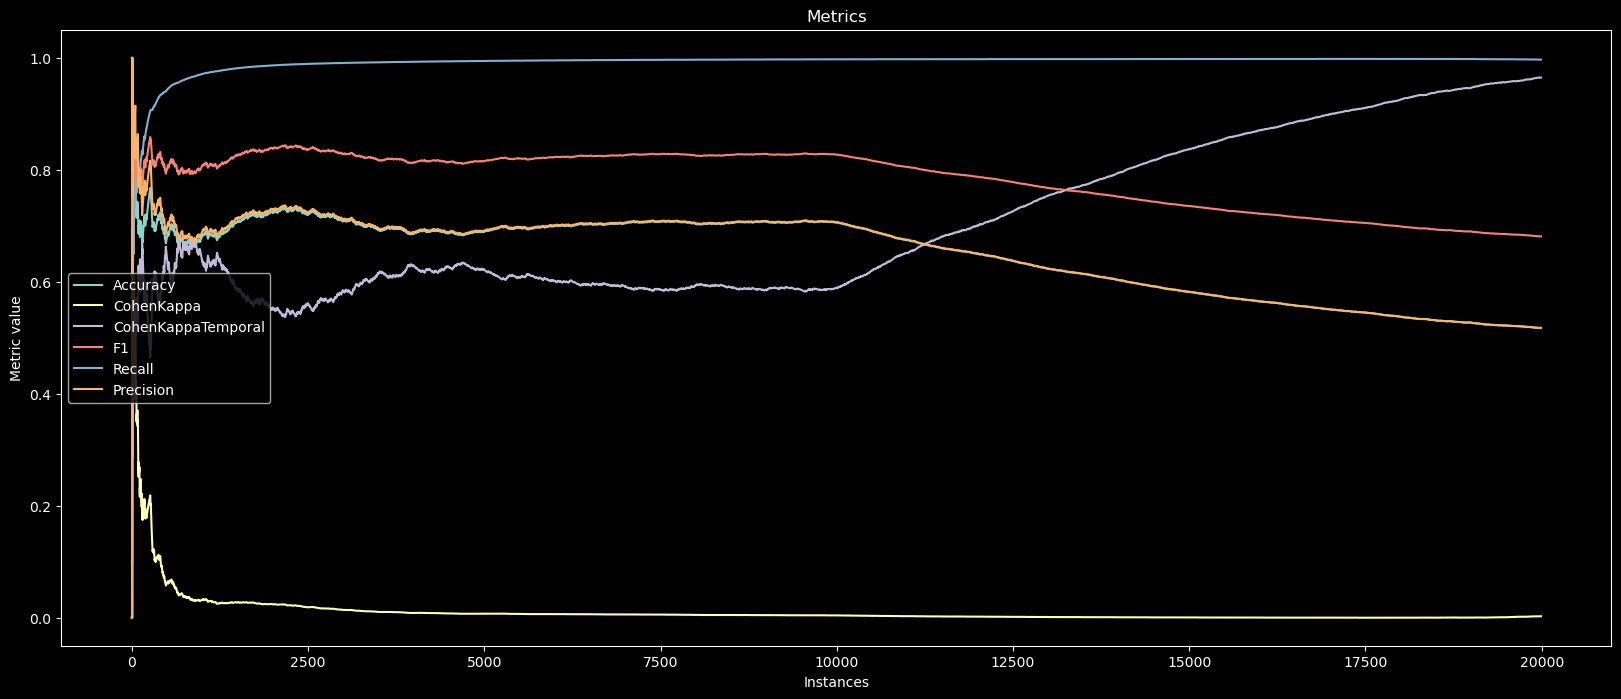

In [180]:
from river import naive_bayes
model = naive_bayes.GaussianNB()

datastream = iter_pandas(X = dataset_drift_labels[features], y = dataset_drift_labels[target])
metric_results = prequential_evaluation(datastream, model)
plot_metrics(metric_results)

### Streaming Machine Learning Ensemble models on both datasets with concept drift


In [ ]:
#import hoeffding adaptive tree classifier and streaming random patches classifier
from river.ensemble import SRPClassifier, AdaptiveRandomForestClassifier


In [ ]:
#TODO